<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
             Diabetes EDA & Machine Learning Prediction
</p>
</div>

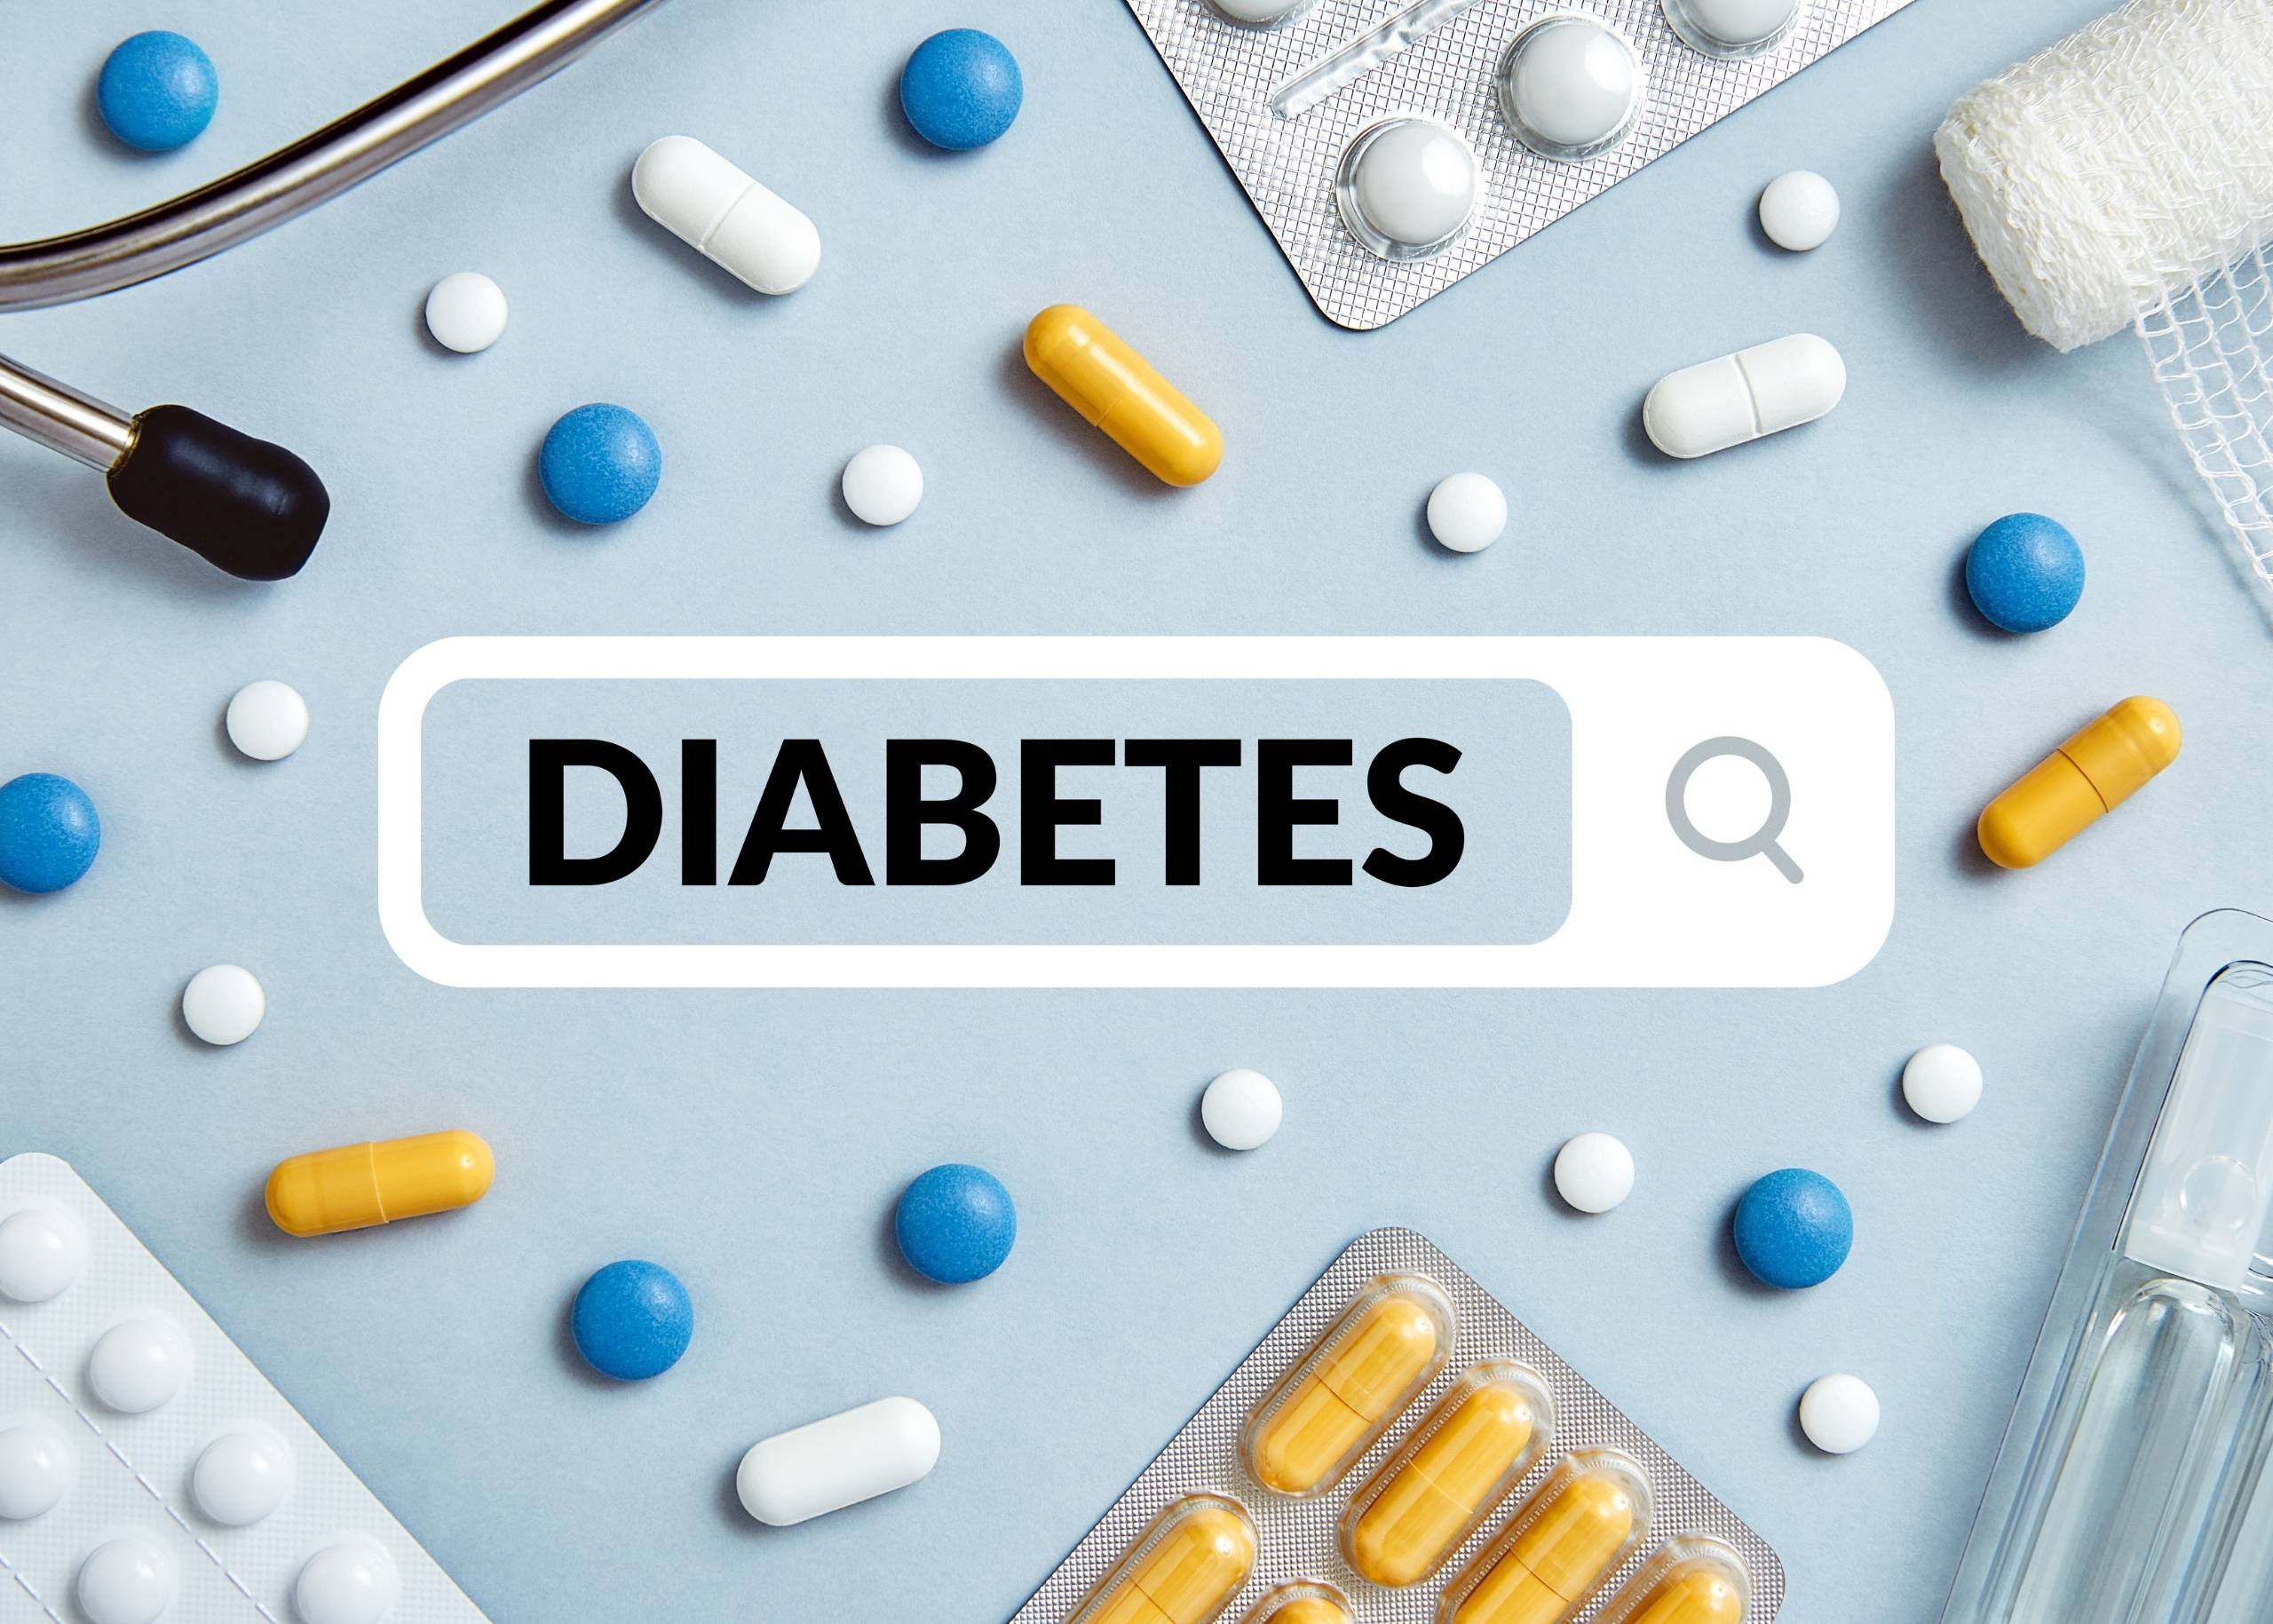

<span style="font-size:26px; color:green">
 Diabete Feature Engineering
</span>


Problem : You are asked to develop a machine learning model that can predict whether people have diabetes when their characteristics are specified. You are expected to perform the necessary data analysis and feature engineering steps before developing the model.

 The dataset is part of a large dataset held at the National Institutes of Diabetes-Digestive-Kidney Diseases in the USA.

 It is the data used for a diabetes study of Pima Indian women aged 21 years and older living in the city of Phoenix, the 5th largest city in the State of Arizona in the USA. It consists of 768 observations and 8 numeric independent variables. The target variable is specified as "outcome"; 1 indicates a positive diabetes test result and 0 indicates a negative result.

Pregnancies: Number of pregnancies

Glucose: Glucose

BloodPressure: Blood Pressure (Diastolic)

SkinThickness: Skin Thickness

Insulin: Insulin

BMI: Body mass index

DiabetesPedigreeFunction: A function that calculates the probability of having diabetes according to our ancestry

Age: Age (years)

Outcome: Information on whether the person has diabetes. Has the disease (1) or does not have the disease (0)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.simplefilter(action="ignore")

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
def load():
    dataframe = pd.read_csv('/kaggle/input/diabetes/diabetes.csv')
    return dataframe

In [4]:
df = load()

<span style="font-size:20px; color:green">Load the data set and enlarge the name of the columns</span>

In [5]:
df.columns = [col.upper() for col in df.columns]
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


<span style="font-size:20px; color:green">Create a function to check pre-info about dataset</span>

In [6]:
def check_df(dataframe, head=5):
    print("-" * 25 + "Shape" + "-" * 25)
    print(dataframe.shape)
    print("-" * 25 + "Types" + "-" * 25)
    print(dataframe.dtypes)
    print("-" * 25 + "The First data" + "-" * 25)
    print(dataframe.head(head))
    print("-" * 25 + "The Last data" + "-" * 25)
    print(dataframe.tail(head))
    print("-" * 25 + "Missing values" + "-" * 25)
    print(dataframe.isnull().sum())
    print("-" * 25 + "Describe the data" + "-" * 25)
    print(dataframe.describe([0, 0.05, 0.25, 0.50, 0.75, 0.95, 0.99, 1]).T)
    print("-" * 25 + "Distinct Values" + "-" * 25)
    print(dataframe.nunique())
check_df(df)

-------------------------Shape-------------------------
(768, 9)
-------------------------Types-------------------------
PREGNANCIES                   int64
GLUCOSE                       int64
BLOODPRESSURE                 int64
SKINTHICKNESS                 int64
INSULIN                       int64
BMI                         float64
DIABETESPEDIGREEFUNCTION    float64
AGE                           int64
OUTCOME                       int64
dtype: object
-------------------------The First data-------------------------
   PREGNANCIES  GLUCOSE  BLOODPRESSURE  SKINTHICKNESS  INSULIN    BMI  \
0            6      148             72             35        0 33.600   
1            1       85             66             29        0 26.600   
2            8      183             64              0        0 23.300   
3            1       89             66             23       94 28.100   
4            0      137             40             35      168 43.100   

   DIABETESPEDIGREEFUNCTION  AGE  OUT

<span style="font-size:20px; color:green">We need to seperates columns such as categorical, numerical and cardinal. Full information about the functions can be found below</span>

In [7]:
def grab_col_names(dataframe, cat_th = 10, car_th = 20):
    """
    Returns the names of categorical, numeric and categorical but cardinal variables in the data set.
    Note : Categorical variables include categorical variables with numeric appearance.

    Parameters
    ------
        dataframe: dataframe
                Variable names of the dataframe to be taken
        cat_th: int, optional
                class threshold for numeric but categorical variables
        car_th: int, optional
                class threshold for categorical but cardinal variables

    Returns
    ------
        cat_cols: list
                Categorical variable list
        num_cols: list
                Numeric variable list
        cat_but_car: list
                List of cardinal variables with categorical appearance

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        num_but_cat is inside cat_cols.

    """
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == 'O']
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != 'O' ]
    cat_but_car = [col for col in dataframe.columns if
                   dataframe[col].nunique() > car_th and dataframe[col].dtypes == 'O']
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != 'O']
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations : {dataframe.shape[0]}")
    print(f"Variables : {dataframe.shape[1]}")
    print(f"cat_cols : {len(cat_cols)}")
    print(f"num_cols : {len(num_cols)}")
    print(f"cat_but_car : {len(cat_but_car)}") #işlevsiz değişken
    print(f"num_but_cat : {len(num_but_cat)}")

    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

cat_cols, num_cols, cat_but_car

Observations : 768
Variables : 9
cat_cols : 1
num_cols : 8
cat_but_car : 0
num_but_cat : 1


(['OUTCOME'],
 ['PREGNANCIES',
  'GLUCOSE',
  'BLOODPRESSURE',
  'SKINTHICKNESS',
  'INSULIN',
  'BMI',
  'DIABETESPEDIGREEFUNCTION',
  'AGE'],
 [])

<span style="font-size:20px; color:green">Categorical Variables Analysis</span>

         OUTCOME  Ratio
OUTCOME                
0            500 65.104
1            268 34.896
##########################################


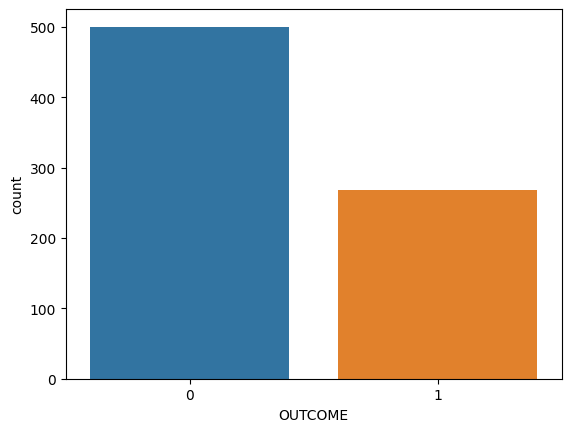

In [8]:
def cat_summary_l(dataframe, cat_cols, plot=False):
    for col_name in cat_cols:
        print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                            "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
        print("##########################################")
        if plot:
            sns.countplot(x=dataframe[col_name], data=dataframe)
            plt.show()

cat_summary_l(df, cat_cols,True)

<span style="font-size:20px; color:green">Numerical Variables Analysis</span>

count   768.000
mean      3.845
std       3.370
min       0.000
5%        0.000
10%       0.000
20%       1.000
30%       1.000
40%       2.000
50%       3.000
60%       4.000
70%       5.000
80%       7.000
90%       9.000
95%      10.000
99%      13.000
max      17.000
Name: PREGNANCIES, dtype: float64


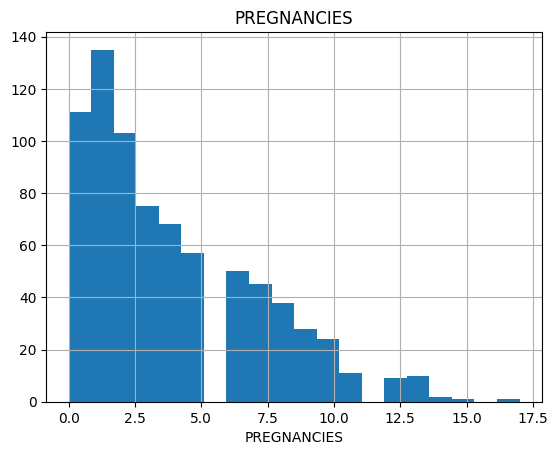

count   768.000
mean    120.895
std      31.973
min       0.000
5%       79.000
10%      85.000
20%      95.000
30%     102.000
40%     109.000
50%     117.000
60%     125.000
70%     134.000
80%     147.000
90%     167.000
95%     181.000
99%     196.000
max     199.000
Name: GLUCOSE, dtype: float64


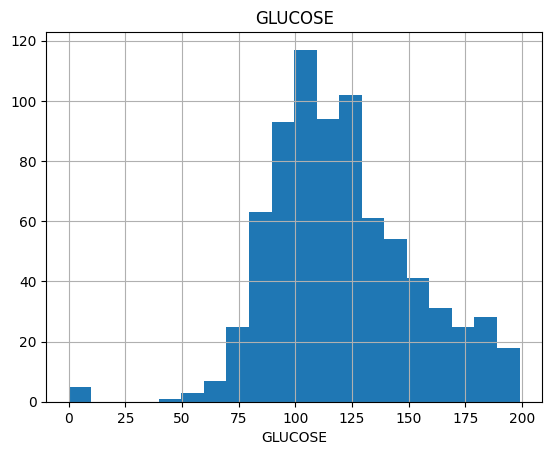

count   768.000
mean     69.105
std      19.356
min       0.000
5%       38.700
10%      54.000
20%      60.000
30%      64.000
40%      68.000
50%      72.000
60%      74.000
70%      78.000
80%      82.000
90%      88.000
95%      90.000
99%     106.000
max     122.000
Name: BLOODPRESSURE, dtype: float64


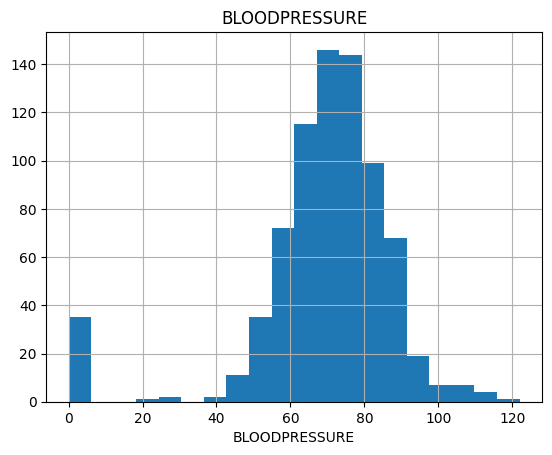

count   768.000
mean     20.536
std      15.952
min       0.000
5%        0.000
10%       0.000
20%       0.000
30%       8.200
40%      18.000
50%      23.000
60%      27.000
70%      31.000
80%      35.000
90%      40.000
95%      44.000
99%      51.330
max      99.000
Name: SKINTHICKNESS, dtype: float64


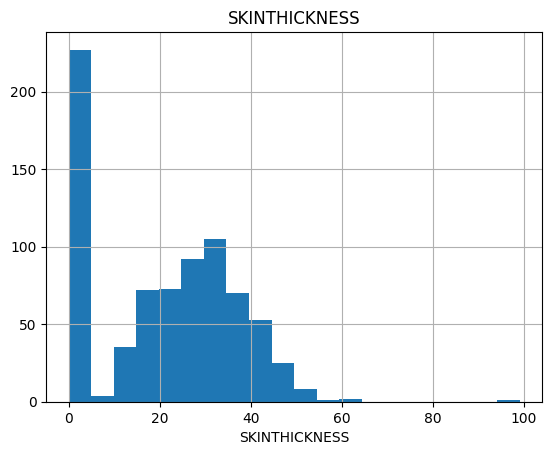

count   768.000
mean     79.799
std     115.244
min       0.000
5%        0.000
10%       0.000
20%       0.000
30%       0.000
40%       0.000
50%      30.500
60%      72.200
70%     106.000
80%     150.000
90%     210.000
95%     293.000
99%     519.900
max     846.000
Name: INSULIN, dtype: float64


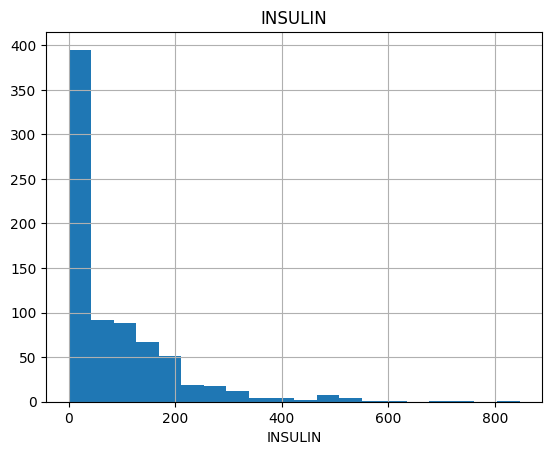

count   768.000
mean     31.993
std       7.884
min       0.000
5%       21.800
10%      23.600
20%      25.900
30%      28.200
40%      30.100
50%      32.000
60%      33.700
70%      35.490
80%      37.800
90%      41.500
95%      44.395
99%      50.759
max      67.100
Name: BMI, dtype: float64


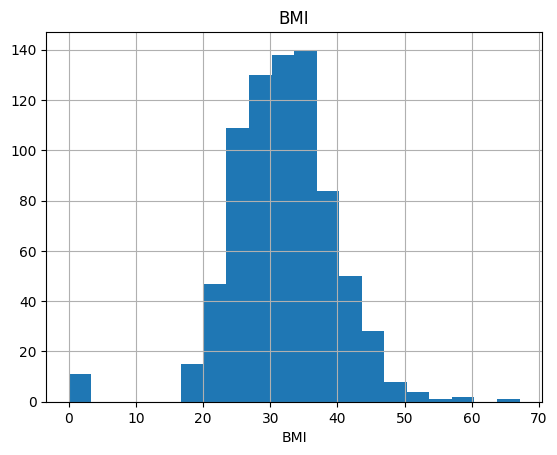

count   768.000
mean      0.472
std       0.331
min       0.078
5%        0.140
10%       0.165
20%       0.219
30%       0.259
40%       0.303
50%       0.372
60%       0.454
70%       0.564
80%       0.687
90%       0.879
95%       1.133
99%       1.698
max       2.420
Name: DIABETESPEDIGREEFUNCTION, dtype: float64


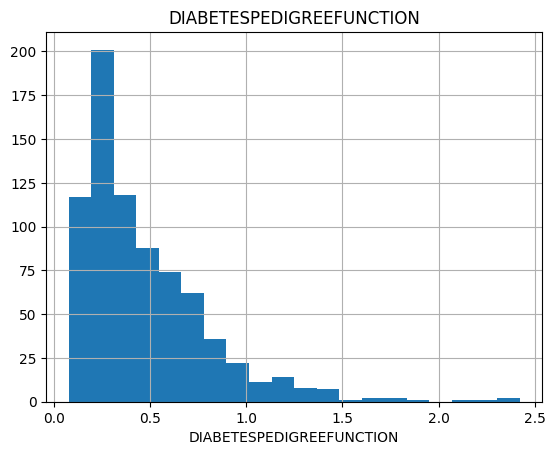

count   768.000
mean     33.241
std      11.760
min      21.000
5%       21.000
10%      22.000
20%      23.000
30%      25.000
40%      27.000
50%      29.000
60%      33.000
70%      38.000
80%      42.600
90%      51.000
95%      58.000
99%      67.000
max      81.000
Name: AGE, dtype: float64


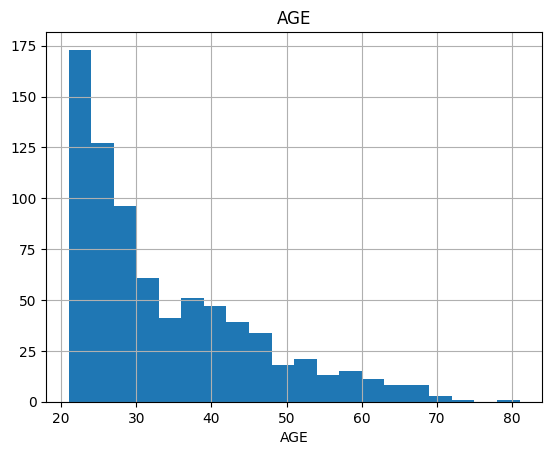

In [9]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()
for col in num_cols:
    num_summary(df,col,True)

<span style="font-size:20px; color:green">Analysis of Numerical Variables by Target</span>

In [10]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target)[num_cols].mean())

target_summary_with_num(df,"OUTCOME",num_cols)

         PREGNANCIES  GLUCOSE  BLOODPRESSURE  SKINTHICKNESS  INSULIN    BMI  \
OUTCOME                                                                       
0              3.298  109.980         68.184         19.664   68.792 30.304   
1              4.866  141.257         70.825         22.164  100.336 35.143   

         DIABETESPEDIGREEFUNCTION    AGE  
OUTCOME                                   
0                           0.430 31.190  
1                           0.550 37.067  


<span style="font-size:20px; color:green">Correlation</span>

<span style="font-size:20px; color:green">Correlation indicates the direction and strength of the linear relationship between two random variables in probability theory and statistics.</span>

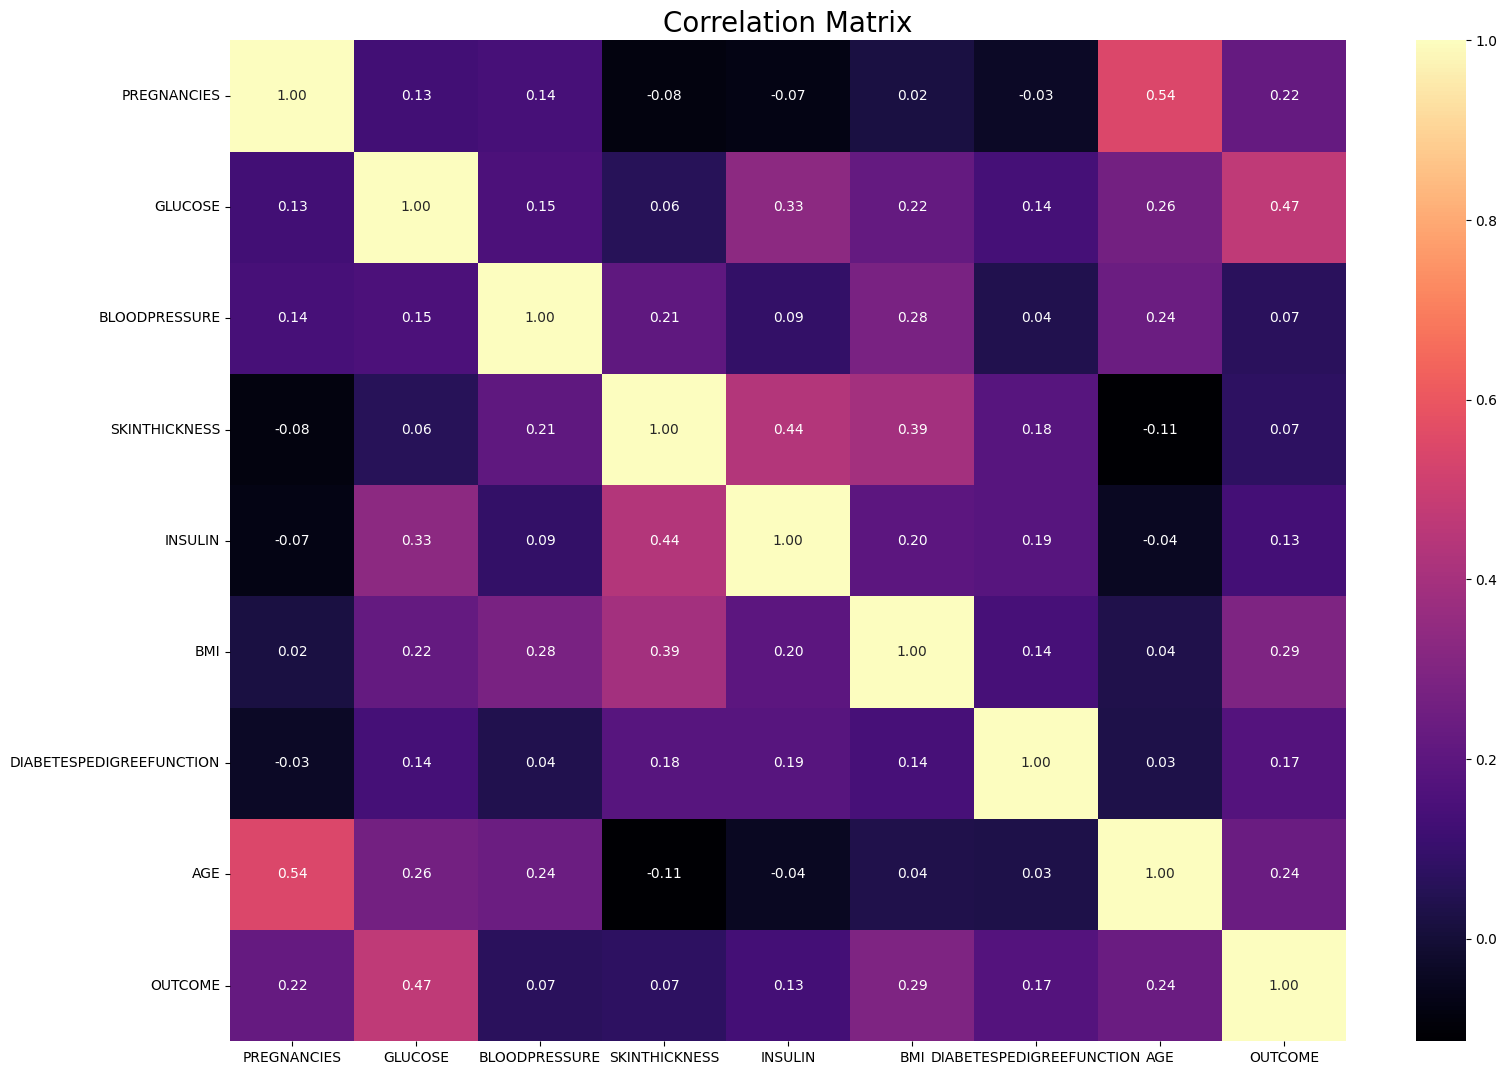

In [11]:
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

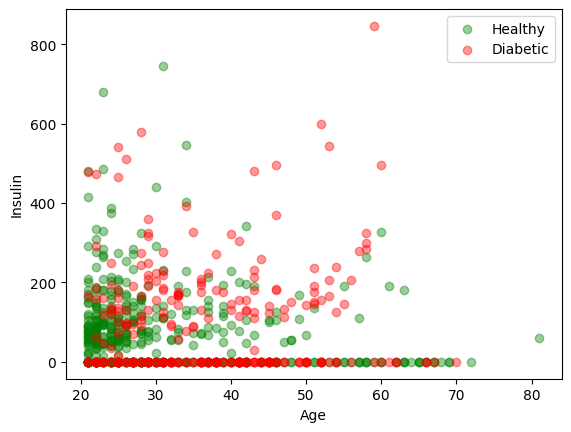

In [12]:
diabetic = df[df.OUTCOME == 1]
healthy = df[df.OUTCOME == 0]

plt.scatter(healthy.AGE, healthy.INSULIN, color="green", label="Healthy", alpha = 0.4)
plt.scatter(diabetic.AGE, diabetic.INSULIN, color="red", label="Diabetic", alpha = 0.4)
plt.xlabel("Age")
plt.ylabel("Insulin")
plt.legend()
plt.show()

<span style="font-size:20px; color:green">FEATURE ENGINEERING</span>

<span style="font-size:20px; color:green">Missing Values Analysis</span>

<span style="font-size:20px; color:green">It is known that variable values without Pregnancies and Outcome cannot be 0 in a human.
Therefore, an action decision must be taken regarding these values. Values that are 0 can be assigned NaN.</span>

In [13]:
# Number of zero values by columns
(df[num_cols] == 0).sum()

PREGNANCIES                 111
GLUCOSE                       5
BLOODPRESSURE                35
SKINTHICKNESS               227
INSULIN                     374
BMI                          11
DIABETESPEDIGREEFUNCTION      0
AGE                           0
dtype: int64

In [14]:
zero_columns = [col for col in df.columns if (df[col].min() == 0 and col not in ["PREGNANCIES", "OUTCOME"])]
zero_columns

['GLUCOSE', 'BLOODPRESSURE', 'SKINTHICKNESS', 'INSULIN', 'BMI']

<span style="font-size:20px; color:green">We reached each of the variables with 0 in the observation units and replaced the observation values containing 0 with NaN.</span>

In [15]:
for col in zero_columns:
    df[col] = np.where(df[col] == 0, np.nan, df[col])
df.isnull().sum() # count of NA values

PREGNANCIES                   0
GLUCOSE                       5
BLOODPRESSURE                35
SKINTHICKNESS               227
INSULIN                     374
BMI                          11
DIABETESPEDIGREEFUNCTION      0
AGE                           0
OUTCOME                       0
dtype: int64

In [16]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    if na_name:
        return na_columns

na_columns = missing_values_table(df, na_name=True)

               n_miss  ratio
INSULIN           374 48.700
SKINTHICKNESS     227 29.560
BLOODPRESSURE      35  4.560
BMI                11  1.430
GLUCOSE             5  0.650


<span style="font-size:20px; color:green">Filling in Missing Values</span>

In [17]:
for col in zero_columns:
    df.loc[df[col].isnull(), col] = df[col].median()

In [18]:
df.isnull().sum()

PREGNANCIES                 0
GLUCOSE                     0
BLOODPRESSURE               0
SKINTHICKNESS               0
INSULIN                     0
BMI                         0
DIABETESPEDIGREEFUNCTION    0
AGE                         0
OUTCOME                     0
dtype: int64

<span style="font-size:20px; color:green">Outlier Analysis</span>

In [19]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

def replace_with_thresholds(dataframe, variable, q1=0.05, q3=0.95):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.05, q3=0.95)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

<span style="font-size:20px; color:green">Suppression Process</span>

In [20]:
# Is there any outlir by columns
# Then replace with th values
for col in df.columns:
    print(col, check_outlier(df, col))
    if check_outlier(df, col):
        replace_with_thresholds(df, col)

PREGNANCIES False
GLUCOSE False
BLOODPRESSURE False
SKINTHICKNESS True
INSULIN True
BMI False
DIABETESPEDIGREEFUNCTION False
AGE False
OUTCOME False


In [21]:
# Check again outliers after replace with threshold processing
for col in df.columns:
    print(col, check_outlier(df, col))

PREGNANCIES False
GLUCOSE False
BLOODPRESSURE False
SKINTHICKNESS False
INSULIN False
BMI False
DIABETESPEDIGREEFUNCTION False
AGE False
OUTCOME False


<span style="font-size:20px; color:green">Feature Extraction</span>

In [22]:
# Let's create new variables before the model

In [23]:
# Categorising the age variable and creating a new age variable
df.loc[(df["AGE"] >= 21) & (df["AGE"] < 50), "NEW_AGE_CAT"] = "mature"
df.loc[(df["AGE"] >= 50), "NEW_AGE_CAT"] = "senior"
df.head()

# BMI below 18.5 is underweight, between 18.5 and 24.9 is normal, between 24.9 and 29.9 is overweight and above 30 is obese
df['NEW_BMI'] = pd.cut(x=df['BMI'], bins=[0, 18.5, 24.9, 29.9, 100],labels=["Underweight", "Healthy", "Overweight", "Obese"])
df.head()

# Convert glucose value to categorical variable
df["NEW_GLUCOSE"] = pd.cut(x=df["GLUCOSE"], bins=[0, 140, 200, 300], labels=["Normal", "Prediabetes", "Diabetes"])
df.head()

# Creating a categorical variable by considering age and body mass index together 3 breakdowns were captured
df.loc[(df["BMI"] < 18.5) & ((df["AGE"] >= 21) & (df["AGE"] < 50)), "NEW_AGE_BMI_NOM"] = "underweightmature"
df.loc[(df["BMI"] < 18.5) & (df["AGE"] >= 50), "NEW_AGE_BMI_NOM"] = "underweightsenior"
df.loc[((df["BMI"] >= 18.5) & (df["BMI"] < 25)) & ((df["AGE"] >= 21) & (df["AGE"] < 50)), "NEW_AGE_BMI_NOM"] = "healthymature"
df.loc[((df["BMI"] >= 18.5) & (df["BMI"] < 25)) & (df["AGE"] >= 50), "NEW_AGE_BMI_NOM"] = "healthysenior"
df.loc[((df["BMI"] >= 25) & (df["BMI"] < 30)) & ((df["AGE"] >= 21) & (df["AGE"] < 50)), "NEW_AGE_BMI_NOM"] = "overweightmature"
df.loc[((df["BMI"] >= 25) & (df["BMI"] < 30)) & (df["AGE"] >= 50), "NEW_AGE_BMI_NOM"] = "overweightsenior"
df.loc[(df["BMI"] > 18.5) & ((df["AGE"] >= 21) & (df["AGE"] < 50)), "NEW_AGE_BMI_NOM"] = "obesemature"
df.loc[(df["BMI"] > 18.5) & (df["AGE"] >= 50), "NEW_AGE_BMI_NOM"] = "obesesenior"

# Creating a categorical variable by considering age and glucose values together
df.loc[(df["GLUCOSE"] < 70) & ((df["AGE"] >= 21) & (df["AGE"] < 50)), "NEW_AGE_GLUCOSE_NOM"] = "lowmature"
df.loc[(df["GLUCOSE"] < 70) & (df["AGE"] >= 50), "NEW_AGE_GLUCOSE_NOM"] = "lowsenior"
df.loc[((df["GLUCOSE"] >= 70) & (df["GLUCOSE"] < 100)) & ((df["AGE"] >= 21) & (df["AGE"] < 50)), "NEW_AGE_GLUCOSE_NOM"] = "normalmature"
df.loc[((df["GLUCOSE"] >= 70) & (df["GLUCOSE"] < 100)) & (df["AGE"] >= 50), "NEW_AGE_GLUCOSE_NOM"] = "normalsenior"
df.loc[((df["GLUCOSE"] >= 100) & (df["GLUCOSE"] <= 125)) & ((df["AGE"] >= 21) & (df["AGE"] < 50)), "NEW_AGE_GLUCOSE_NOM"] = "hiddenmature"
df.loc[((df["GLUCOSE"] >= 100) & (df["GLUCOSE"] <= 125)) & (df["AGE"] >= 50), "NEW_AGE_GLUCOSE_NOM"] = "hiddensenior"
df.loc[(df["GLUCOSE"] > 125) & ((df["AGE"] >= 21) & (df["AGE"] < 50)), "NEW_AGE_GLUCOSE_NOM"] = "highmature"
df.loc[(df["GLUCOSE"] > 125) & (df["AGE"] >= 50), "NEW_AGE_GLUCOSE_NOM"] = "highsenior"

df["NEW_GLUCOSE*PREGNANCIES"] = df["GLUCOSE"] * df["PREGNANCIES"]
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,NEW_AGE_CAT,NEW_BMI,NEW_GLUCOSE,NEW_AGE_BMI_NOM,NEW_AGE_GLUCOSE_NOM,NEW_GLUCOSE*PREGNANCIES
0,6,148.000,72.000,35.000,125.000,33.600,0.627,50,1,senior,Obese,Prediabetes,obesesenior,highsenior,888.000
1,1,85.000,66.000,29.000,125.000,26.600,0.351,31,0,mature,Overweight,Normal,obesemature,normalmature,85.000
2,8,183.000,64.000,29.000,125.000,23.300,0.672,32,1,mature,Healthy,Prediabetes,obesemature,highmature,1464.000
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0,mature,Overweight,Normal,obesemature,normalmature,89.000
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33,1,mature,Obese,Normal,obesemature,highmature,0.000


<span style="font-size:20px; color:green">ENCODING</span>

<span style="font-size:20px; color:green">LABEL ENCODING</span>

In [24]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [25]:
binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]
binary_cols

['NEW_AGE_CAT']

In [26]:
for col in binary_cols:
    df = label_encoder(df, col)
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,NEW_AGE_CAT,NEW_BMI,NEW_GLUCOSE,NEW_AGE_BMI_NOM,NEW_AGE_GLUCOSE_NOM,NEW_GLUCOSE*PREGNANCIES
0,6,148.000,72.000,35.000,125.000,33.600,0.627,50,1,1,Obese,Prediabetes,obesesenior,highsenior,888.000
1,1,85.000,66.000,29.000,125.000,26.600,0.351,31,0,0,Overweight,Normal,obesemature,normalmature,85.000
2,8,183.000,64.000,29.000,125.000,23.300,0.672,32,1,0,Healthy,Prediabetes,obesemature,highmature,1464.000
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0,0,Overweight,Normal,obesemature,normalmature,89.000
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33,1,0,Obese,Normal,obesemature,highmature,0.000


<span style="font-size:20px; color:green">ONE-HOT ENCODING</span>

<span style="font-size:20px; color:green">Update the cat_cols</span>

In [27]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)
cat_cols = [col for col in cat_cols if col not in binary_cols and col not in ["OUTCOME"]]
cat_cols

Observations : 768
Variables : 15
cat_cols : 6
num_cols : 9
cat_but_car : 0
num_but_cat : 4


['NEW_AGE_BMI_NOM', 'NEW_AGE_GLUCOSE_NOM', 'NEW_BMI', 'NEW_GLUCOSE']

In [28]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [29]:
df = one_hot_encoder(df, cat_cols, drop_first=True)
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,NEW_AGE_CAT,NEW_GLUCOSE*PREGNANCIES,NEW_AGE_BMI_NOM_obesesenior,NEW_AGE_BMI_NOM_underweightmature,NEW_AGE_GLUCOSE_NOM_hiddensenior,NEW_AGE_GLUCOSE_NOM_highmature,NEW_AGE_GLUCOSE_NOM_highsenior,NEW_AGE_GLUCOSE_NOM_lowmature,NEW_AGE_GLUCOSE_NOM_lowsenior,NEW_AGE_GLUCOSE_NOM_normalmature,NEW_AGE_GLUCOSE_NOM_normalsenior,NEW_BMI_Healthy,NEW_BMI_Overweight,NEW_BMI_Obese,NEW_GLUCOSE_Prediabetes,NEW_GLUCOSE_Diabetes
0,6,148.000,72.000,35.000,125.000,33.600,0.627,50,1,1,888.000,True,False,False,False,True,False,False,False,False,False,False,True,True,False
1,1,85.000,66.000,29.000,125.000,26.600,0.351,31,0,0,85.000,False,False,False,False,False,False,False,True,False,False,True,False,False,False
2,8,183.000,64.000,29.000,125.000,23.300,0.672,32,1,0,1464.000,False,False,False,True,False,False,False,False,False,True,False,False,True,False
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0,0,89.000,False,False,False,False,False,False,False,True,False,False,True,False,False,False
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33,1,0,0.000,False,False,False,True,False,False,False,False,False,False,False,True,False,False


In [30]:
boolean_columns = ['NEW_AGE_BMI_NOM_obesesenior','NEW_AGE_BMI_NOM_underweightmature','NEW_AGE_GLUCOSE_NOM_hiddensenior','NEW_AGE_GLUCOSE_NOM_highmature','NEW_AGE_GLUCOSE_NOM_highsenior','NEW_AGE_GLUCOSE_NOM_lowmature','NEW_AGE_GLUCOSE_NOM_lowsenior','NEW_AGE_GLUCOSE_NOM_normalmature','NEW_AGE_GLUCOSE_NOM_normalsenior','NEW_BMI_Healthy','NEW_BMI_Overweight','NEW_BMI_Obese','NEW_GLUCOSE_Prediabetes','NEW_GLUCOSE_Diabetes']
df[boolean_columns] = df[boolean_columns].astype(int)
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,NEW_AGE_CAT,NEW_GLUCOSE*PREGNANCIES,NEW_AGE_BMI_NOM_obesesenior,NEW_AGE_BMI_NOM_underweightmature,NEW_AGE_GLUCOSE_NOM_hiddensenior,NEW_AGE_GLUCOSE_NOM_highmature,NEW_AGE_GLUCOSE_NOM_highsenior,NEW_AGE_GLUCOSE_NOM_lowmature,NEW_AGE_GLUCOSE_NOM_lowsenior,NEW_AGE_GLUCOSE_NOM_normalmature,NEW_AGE_GLUCOSE_NOM_normalsenior,NEW_BMI_Healthy,NEW_BMI_Overweight,NEW_BMI_Obese,NEW_GLUCOSE_Prediabetes,NEW_GLUCOSE_Diabetes
0,6,148.000,72.000,35.000,125.000,33.600,0.627,50,1,1,888.000,1,0,0,0,1,0,0,0,0,0,0,1,1,0
1,1,85.000,66.000,29.000,125.000,26.600,0.351,31,0,0,85.000,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2,8,183.000,64.000,29.000,125.000,23.300,0.672,32,1,0,1464.000,0,0,0,1,0,0,0,0,0,1,0,0,1,0
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0,0,89.000,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33,1,0,0.000,0,0,0,1,0,0,0,0,0,0,0,1,0,0


<span style="font-size:20px; color:green">Standardization for numeric variable</span>

In [31]:
rs = RobustScaler()
df[num_cols] = rs.fit_transform(df[num_cols])
df[num_cols].head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,NEW_GLUCOSE*PREGNANCIES
0,0.600,0.765,0.000,0.857,0.000,0.143,0.665,1.235,0.909
1,-0.400,-0.790,-0.375,0.000,0.000,-0.626,-0.056,0.118,-0.422
2,1.000,1.630,-0.500,0.000,0.000,-0.989,0.783,0.176,1.864
3,-0.400,-0.691,-0.375,-0.857,-5.391,-0.462,-0.537,-0.471,-0.415
4,-0.600,0.494,-2.000,0.857,7.478,1.187,5.008,0.235,-0.563


<span style="font-size:20px; color:green">Create a Model</span>

In [32]:
y = df["OUTCOME"]
X = df.drop("OUTCOME", axis=1)
y.value_counts(normalize=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=17)

In [33]:
rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [34]:
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
print(f"Recall: {round(recall_score(y_pred,y_test),3)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 2)}")
print(f"F1: {round(f1_score(y_pred,y_test), 2)}")
print(f"Auc: {round(roc_auc_score(y_pred,y_test), 2)}")

Accuracy: 0.8
Recall: 0.789
Precision: 0.63
F1: 0.7
Auc: 0.8


    Value                            Feature
1   0.157                            GLUCOSE
5   0.113                                BMI
9   0.111            NEW_GLUCOSE*PREGNANCIES
7   0.109                                AGE
6   0.105           DIABETESPEDIGREEFUNCTION
..    ...                                ...
18  0.002   NEW_AGE_GLUCOSE_NOM_normalsenior
15  0.001      NEW_AGE_GLUCOSE_NOM_lowmature
11  0.000  NEW_AGE_BMI_NOM_underweightmature
16  0.000      NEW_AGE_GLUCOSE_NOM_lowsenior
23  0.000               NEW_GLUCOSE_Diabetes

[24 rows x 2 columns]


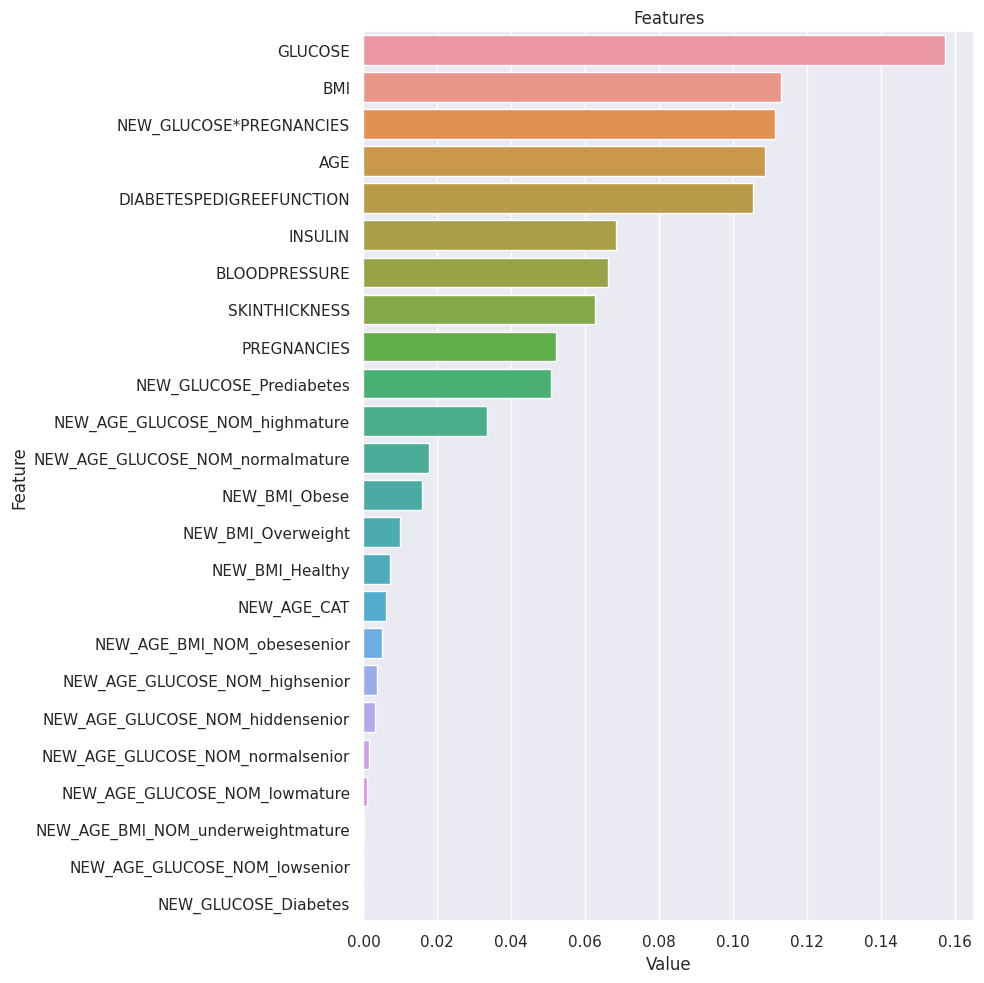

In [35]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    print(feature_imp.sort_values("Value",ascending=False))
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(rf_model, X)